In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

train_dir = 'data/training'

In [9]:
def cal_unique_col(img):
    return np.unique(np.array(img))

In [169]:
class img:  
    # constructor   
    def __init__(self, pixels):  
        self.pixels = pixels 
        self.col_contain = cal_unique_col(self.pixels)
    def get_col_loc()

In [170]:
class pair:
    def __init__(self, inp, oup):
        self.input = inp
        self.output = oup
    def get_input_p(self):
        return self.input.pixels
    def get_output_p(self):
        return self.output.pixels
    def get_color_used(self):
        return np.array([self.input.col_contain, self.output.col_contain])
    def color_whether_change(self):
        positive = [x for x in self.output.col_contain if x not in self.input.col_contain]
        negative = [x for x in self.input.col_contain if x not in self.output.col_contain]
        return np.concatenate((np.array(positive), np.negative(np.array(negative))))

In [171]:
class task:
    def __init__(self, trains=[]):
        self.trains = trains
    def add_train(self, train):
        self.trains.append(train)
    def set_test(self, test):
        self.test = test
    def get_pair(self, index):
        return self.trains[index]
    def display(self):
        size = len(self.trains)
        fig, ax = plt.subplots(2, size+1, figsize=(4*size, 8))
        for i in range(size): 
            ax[0][i].imshow(self.trains[i].get_input_p())
            ax[0][i].set_title('{i} train input'.format(i=i))
            ax[1][i].imshow(self.trains[i].get_output_p())
            ax[1][i].set_title('{i} train output'.format(i=i))
        ax[0][size].imshow(self.test.get_input_p())
        ax[0][size].set_title('test input')
        ax[1][size].imshow(self.test.get_output_p())
        ax[1][size].set_title('test output') 
    def get_color(self):
        temp = []
        for train in self.trains:
            temp.append(train.get_color_used())
        temp.append(self.test.get_color_used())
        return np.array(temp)

In [172]:
def read_pair(dct):
    inp = img(dct['input'])
    oup = img(dct['output'])
    return pair(inp, oup)

In [173]:
def read_task(dct):
    testp = read_pair(dct['test'][0])
    trainp = dct['train']
    temp = task([])
    temp.set_test(testp)
    for train in trainp:
        temp.add_train(read_pair(train))
    return temp

In [174]:
tasks = []
for file in os.listdir(train_dir):
    with open(os.path.join(train_dir, file)) as f:
        temp = json.load(f)
        tasks.append(read_task(temp))

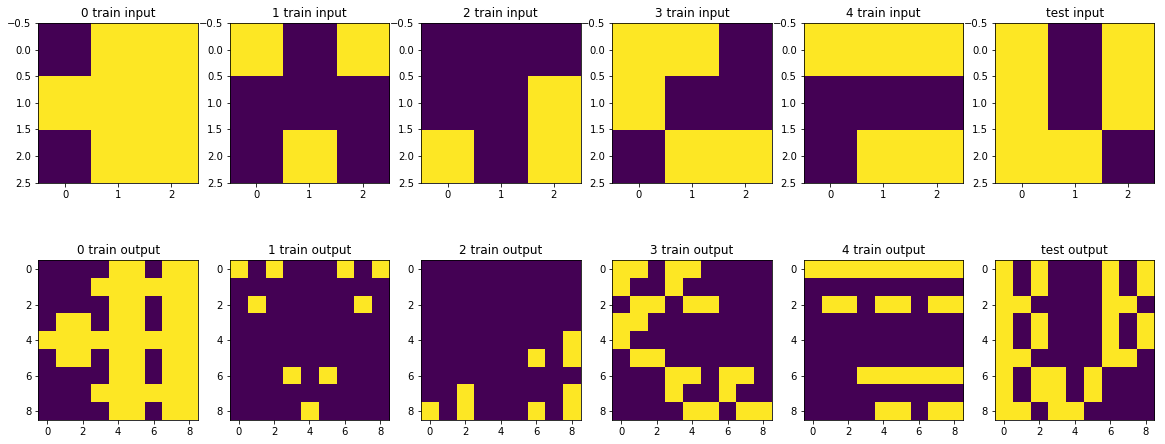

In [125]:
tasks[0].display()

In [175]:
tasks[2].get_color()

array([[[0, 1],
        [0, 2]],

       [[0, 1],
        [0, 2]],

       [[0, 1],
        [0, 2]],

       [[0, 1],
        [0, 2]]])

array([], dtype=float64)